## In develop method for transfer .bin to .npy 

In [1]:
import struct
from struct import unpack
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from PIL import Image, ImageDraw

In [2]:
def unpack_drawing(file_handler, object_name):
	
	key_id, = unpack('Q', file_handler.read(8))
	country_code, = unpack('2s', file_handler.read(2))
	recognized, = unpack('b', file_handler.read(1))
	timestamp, = unpack('I', file_handler.read(4))
	n_strokes, = unpack('H', file_handler.read(2))
 
	image = []
	
	for i in range(n_strokes):
		n_points, = unpack('H', file_handler.read(2))
		fmt = str(n_points) + 'B'
		x = list(unpack(fmt, file_handler.read(n_points)))
		y = list(unpack(fmt, file_handler.read(n_points)))
		image.append([x, y])

	return {
		'key': key_id,
		'word': object_name,
		'country_code': country_code,
		'recognized': recognized==1,
		'timestamp': timestamp,
		'image': image
	}

In [66]:
def unpack_all_drawings(filename):
    file_path = os.path.basename(filename)
    object_name, ext = os.path.splitext(file_path)
    with open(filename, 'rb') as f:
        for i in range(5):
            try:
                yield unpack_drawing(f, object_name)
            except struct.error:
                break

In [67]:
def draw_vector_img(drawing_list):
    idx = 0
    for drawing in drawing_list:
        label = drawing["word"]
        raw_drawing = drawing["image"]
        polylines = []
        for polyline in raw_drawing:
            zip_list = list(zip(polyline[0], polyline[1]))
            polylines.append(zip_list)
        
        pil_img = Image.new("RGB", (240, 270), (255,255,255))
        d = ImageDraw.Draw(pil_img)
        for polyline in polylines:
            d.line(polyline, fill=(0,0,0), width=3)
        pil_img.save(f'./image/{label}_{idx}.png')
        idx+=1

In [95]:
from imageio.v2 import imread
test = []
for drawing in unpack_all_drawings("./bin_data/asparagus.bin"):
    test.append(drawing)

draw_vector_img(test)




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


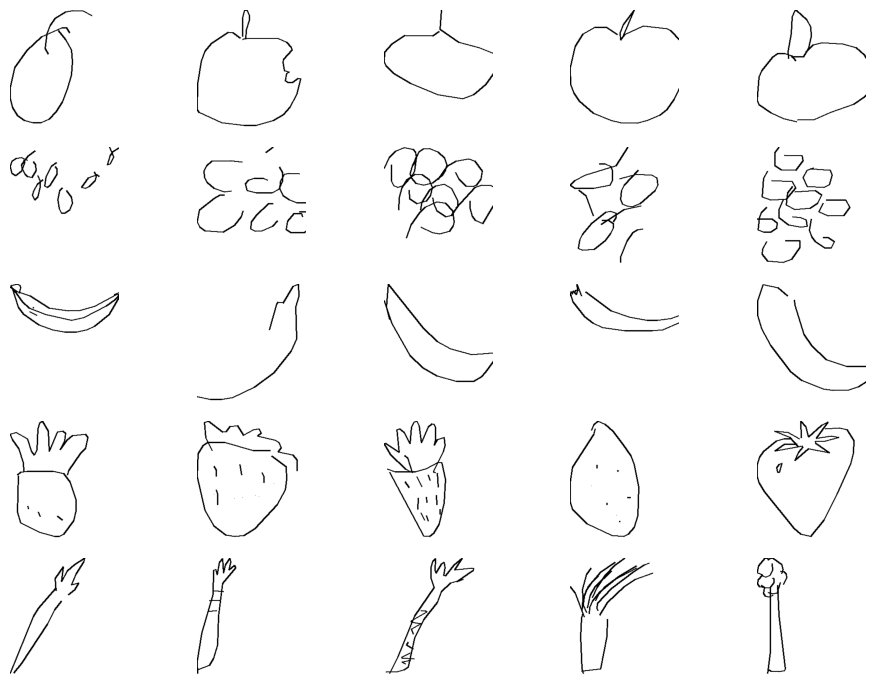

In [96]:
fig = plt.figure(figsize=(10,7))
num = 1
row = 5
col = 5
for idx in range(5):
    print(num)
    img = imread(f'./image/apple_{idx}.png')
    fig.add_subplot(row, col, num)
    plt.imshow(img)
    plt.axis("off")
    num+=1
    
for idx in range(5):
    print(num)
    img = imread(f'./image/grapes_{idx}.png')
    fig.add_subplot(row, col, num)
    plt.imshow(img)
    plt.axis("off")
    num+=1

for idx in range(5):
    print(num)
    img = imread(f'./image/banana_{idx}.png')
    fig.add_subplot(row, col, num)
    plt.imshow(img)
    plt.axis("off")
    num+=1
    
for idx in range(5):
    print(num)
    img = imread(f'./image/strawberry_{idx}.png')
    fig.add_subplot(row, col, num)
    plt.imshow(img)
    plt.axis("off")
    num+=1

for idx in range(5):
    print(num)
    img = imread(f'./image/asparagus_{idx}.png')
    fig.add_subplot(row, col, num)
    plt.imshow(img)
    plt.axis("off")
    num+=1  

plt.tight_layout()
fig.savefig("./image/vector_img.png")


In [28]:
def add_image(df, fruit):
    df_fruit_image = pd.DataFrame(fruit)
    df = pd.concat([df, df_fruit_image], axis = 1)
    df = df[df['recognized'] == True]
    df = df.drop(['recognized'], axis = 1)
    df = df.sample(n = 1000, replace=True)
    return df

In [29]:
def merge_df(nparr, word):
    df = pd.DataFrame(columns=['key', 'word', 'country_code', 'recognized', 'timestamp', 'image'])
    datalist = []
    for drawing in unpack_all_drawings(f"./bin_data/{word}.bin"):
        datalist.append(drawing)
    df = pd.DataFrame(datalist)
    df_imgs = pd.DataFrame(nparr)
    df = pd.concat([df, df_imgs], axis=1)
    
    return df

In [ ]:
def plot(df):
    df_plot = df[0:9]
    examples = [ast.literal_eval(pts) for pts in df_plot.image.values]
    
    fig, axes = plt.subplots(2, 5, figsize=(18,6))
    axes = axes.ravel()
    
    for i, example in enumerate(examples):
        for x, y in example:
            axes[i].plot(x, y, marker='.')
            axes[i].axis('off')
            if i==10:
                break
    
    fig.savefig("./test_plot.png", bbox_inches='tight')

In [ ]:
apple_imgs = np.load("./npy_data/apple.npy")
grapes_imgs = np.load("./npy_data/grapes.npy")
banaba_imgs = np.load("./npy_data/banana.npy")
strawberry_imgs = np.load("./npy_data/strawberry.npy")
asparagus_imgs = np.load("npy_data/asparagus.npy")

In [ ]:
plot_imgs = np.vstack((apple_imgs[0:5], grapes_imgs[0:5], banaba_imgs[0:5], strawberry_imgs[0:5], asparagus_imgs[0:5]))
df = merge_df(apple_imgs[0:10], "apple")

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(10,10))
axes = axes.flatten()

for i, img in enumerate(plot_imgs):
    img = img.reshape(28,28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
fig.savefig("./image/test_plot.png")

In [ ]:
df.to_csv("./data.csv")
df.head(10)

In [ ]:
recognized = 0
unrecognized = 0
for drawing in unpack_all_drawings("./bin_data/apple.bin"):
    if drawing["recognized"]:
        recognized+=1
    else:
        unrecognized+=1
        
for drawing in unpack_all_drawings("./bin_data/banana.bin"):
    if drawing["recognized"]:
        recognized+=1
    else:
        unrecognized+=1
        
for drawing in unpack_all_drawings("./bin_data/asparagus.bin"):
    if drawing["recognized"]:
        recognized+=1
    else:
        unrecognized+=1

for drawing in unpack_all_drawings("./bin_data/grapes.bin"):
    if drawing["recognized"]:
        recognized+=1
    else:
        unrecognized+=1

for drawing in unpack_all_drawings("./bin_data/strawberry.bin"):
    if drawing["recognized"]:
        recognized+=1
    else:
        unrecognized+=1

print(recognized)
print(unrecognized)

In [ ]:
labels = ['Recognized', 'Unrecognized']
sizes = [recognized, unrecognized]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.show()

In [ ]:
plot_arr = []
for drawing in unpack_all_drawings("./bin_data/apple.bin"):
    plot_arr.append(drawing)

sample_df = pd.DataFrame(plot_arr)
sample_df.head(10)